In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [227]:
sns.set_theme()

In [2]:
taxi = pd.read_csv('taxi-dataset.csv')

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unique_key              200000 non-null  object 
 1   taxi_id                 200000 non-null  object 
 2   trip_start_timestamp    200000 non-null  object 
 3   trip_end_timestamp      200000 non-null  object 
 4   trip_seconds            199957 non-null  float64
 5   trip_miles              199989 non-null  float64
 6   pickup_census_tract     88947 non-null   float64
 7   dropoff_census_tract    77952 non-null   float64
 8   pickup_community_area   170983 non-null  float64
 9   dropoff_community_area  126673 non-null  float64
 10  fare                    199988 non-null  float64
 11  tips                    199988 non-null  float64
 12  tolls                   169863 non-null  float64
 13  extras                  199988 non-null  float64
 14  trip_total          

In [4]:
taxi.isnull().sum()

unique_key                     0
taxi_id                        0
trip_start_timestamp           0
trip_end_timestamp             0
trip_seconds                  43
trip_miles                    11
pickup_census_tract       111053
dropoff_census_tract      122048
pickup_community_area      29017
dropoff_community_area     73327
fare                          12
tips                          12
tolls                      30137
extras                        12
trip_total                    12
payment_type                   0
company                    93668
pickup_latitude            29002
pickup_longitude           29002
pickup_location            29002
dropoff_latitude           73327
dropoff_longitude          73327
dropoff_location           73327
dtype: int64

<AxesSubplot:>

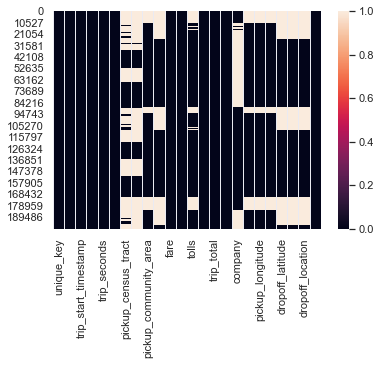

In [228]:
sns.heatmap(taxi.isnull())
#white paches are the missing data

First quantitative glance: 
- many nulls, 
- little data in census_tract columns, 
- missing data in dropoff columns,
- some missing data in pickup columns.

If we were to use that data with ML models it would require cleaning.
Ad hock cleanup strategy maximising the amount of data:
- remove census columns, 
- drop null entries for most columns,
Now I shoud be left with nulls in pickup, dropoff and company. 
- company is missing almost 50% of data
- dropoff is missing roughly 40%,
- pickup is missing only around 15%.

We could drop company column and drop null entries for pkup/dpoff locations, but thats is a lot af data even if those missing values happen to overlap, if they are spread out that might be too much data lost.

Alternatively we could find a way to feature engineer missing data. That will requiere further insight into correlation between features.

First I will check the dataset for any potential discrepancies as they could corrupt later observations/conclusions.

In [23]:
taxi.dropna().head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,timestamp_diff
111395,0f28fc961d1dcf845b70cae628ea7a8229713707,52cfee58bdd389e10379d8956eb4e5a57b8cf8777f8720...,2017-08-24 22:30:00+00:00,2017-08-24 22:30:00+00:00,7.0,0.02,1.703106e+10,1.703106e+10,6.0,6.0,...,3.25,Cash,Chicago Carriage Cab Corp,41.941628,-87.661443,POINT (-87.6614433685 41.9416281),41.941628,-87.661443,POINT (-87.6614433685 41.9416281),0.0
111396,c21b11828bf42ecf460550ffe022f20cf9f5188f,c2b68f42a1106079a4a6fb9f60e492a27d5735f2dd9d13...,2017-08-18 15:30:00+00:00,2017-08-18 16:00:00+00:00,1839.0,7.53,1.703133e+10,1.703106e+10,33.0,6.0,...,30.00,Credit Card,Chicago Carriage Cab Corp,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.941628,-87.661443,POINT (-87.6614433685 41.9416281),1800.0
111397,72a35715fb37679ddd0a64a7eca4144e8ce57f51,a81c9d35e36a74e51b5cff3a4c26189fd7033a776d27d1...,2017-08-11 18:15:00+00:00,2017-08-11 18:30:00+00:00,869.0,2.23,1.703107e+10,1.703106e+10,7.0,6.0,...,12.50,Credit Card,Sun Taxi,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.941628,-87.661443,POINT (-87.6614433685 41.9416281),900.0
111398,f7b4059202139e2d63fbb909c777cbd2010d1584,1cb849981e7c08360d39e735c3eef0fb86933d82f0888b...,2017-08-12 18:00:00+00:00,2017-08-12 18:00:00+00:00,811.0,1.56,1.703106e+10,1.703106e+10,6.0,6.0,...,10.00,Cash,24 Seven Taxi,41.943155,-87.640698,POINT (-87.640698076 41.9431550855),41.941628,-87.661443,POINT (-87.6614433685 41.9416281),0.0
111399,816e5f6ba4b9eee8b30291e76ba2a36bff499b79,b25b4270acfce8db67cf2fd8f4baddb102e3c389c05881...,2017-08-10 19:15:00+00:00,2017-08-10 19:30:00+00:00,1311.0,4.76,1.703128e+10,1.703106e+10,28.0,6.0,...,15.75,Cash,City Service,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.941628,-87.661443,POINT (-87.6614433685 41.9416281),900.0


In [35]:
taxi.dropna()[taxi.columns.tolist()[9:]].head()

,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
111395,6.0,3.25,0.0,0.0,0.0,3.25,Cash,Chicago Carriage Cab Corp,41.941628,-87.661443,POINT (-87.6614433685 41.9416281),41.941628,-87.661443,POINT (-87.6614433685 41.9416281)
111396,6.0,23.50,5.0,0.0,1.0,30.00,Credit Card,Chicago Carriage Cab Corp,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.941628,-87.661443,POINT (-87.6614433685 41.9416281)
111397,6.0,10.00,2.0,0.0,0.0,12.50,Credit Card,Sun Taxi,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.941628,-87.661443,POINT (-87.6614433685 41.9416281)
111398,6.0,9.00,0.0,0.0,1.0,10.00,Cash,24 Seven Taxi,41.943155,-87.640698,POINT (-87.640698076 41.9431550855),41.941628,-87.661443,POINT (-87.6614433685 41.9416281)
111399,6.0,15.75,0.0,0.0,0.0,15.75,Cash,City Service,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.941628,-87.661443,POINT (-87.6614433685 41.9416281)


Unique_key and taxi_id seem to be randomly generated ids. Not much informations there,  
timestamps could be transformed into datetime objects,  
trip_time missing values could be calculated from timestamps,  
census_tracts - I'm not familiar with that name but websearch sugests its got to do with location (877 census tracts in Chicago)  
community_area - I foud out those are indicative of location as well (Chickago being divided into 77 community areas)  
pkup/dropoff locations - websearch suggests that they correspond to consensus_tract or community_area 

In [10]:
taxi['trip_start_timestamp'] = pd.to_datetime(taxi['trip_start_timestamp'])

In [11]:
taxi['trip_end_timestamp'] = pd.to_datetime(taxi['trip_end_timestamp'])

In [13]:
taxi['timestamp_diff'] = taxi[['trip_end_timestamp', 'trip_start_timestamp']].apply(lambda row: (row[0]-row[1]).total_seconds(), axis=1)

In [14]:
taxi[taxi['timestamp_diff'] != taxi['trip_seconds']]['trip_seconds'].count()

189938

Surprisingly the majority of the data has either wrong timestamps or trip times.
Not knowing which ones are correct, I will use oryginal trip_seconds for trip time and use timestamps only to determine the date or time of day when the trip took place

geolocations should correspond to either census_tract or community_area, lets check that

In [29]:
def sub_col(word):
    return list(filter(lambda  x: word in x, taxi.columns.tolist()))

In [31]:
taxi[sub_col('pickup') + sub_col('dropoff')].count()

pickup_census_tract        88947
pickup_community_area     170983
pickup_latitude           170998
pickup_longitude          170998
pickup_location           170998
dropoff_census_tract       77952
dropoff_community_area    126673
dropoff_latitude          126673
dropoff_longitude         126673
dropoff_location          126673
dtype: int64

In [32]:
taxi[sub_col('pickup')].count()

pickup_census_tract       88947
pickup_community_area    170983
pickup_latitude          170998
pickup_longitude         170998
pickup_location          170998
dtype: int64

In [40]:
type(taxi['pickup_location'].loc[199997])
#sidenote: longitudes and latitudes seem redundant if there is location, but it is in string format so we would need to change that

str

In [69]:
#If there is a community_area or census_tract there should be a location.
#I am trying to find if there is an entry with community or census but without location
taxi[taxi['pickup_location'].isnull()][['pickup_community_area','pickup_census_tract']].notnull().sum()

pickup_community_area      0
pickup_census_tract      801
dtype: int64

In [ ]:
QUERY = """
SELECT
  pickup_community_area,
  pickup_census_tract,
  COUNT(1) AS rides
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  pickup_location IS NULL
AND 
  pickup_census_tract IS NOT NULL
AND 
  pickup_community_area IS NOT NULL
GROUP BY 
  pickup_community_area, pickup_census_tract
"""
#This didnt return any results.

In [70]:
taxi[taxi['dropoff_location'].isnull()][['pickup_community_area','pickup_census_tract']].notnull().sum()

pickup_community_area    44407
pickup_census_tract      13520
dtype: int64

The locations are meant to be the locations of either the census_track or community_area but there seem to be entries where location data is incomplete.

I was hoping that we could ignore communit and consensus data and use location. That is not the case.

We could infer the location from census/community data but it would require some web scrapping for location data.

An alternative way to investigate relation between different location null-data is through visualisation.

<AxesSubplot:>

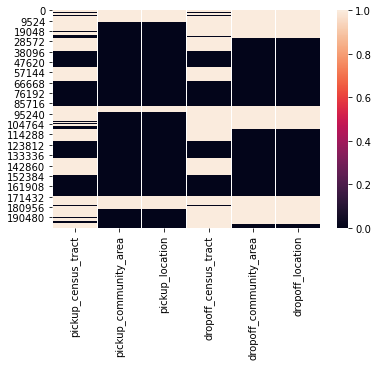

In [134]:
#are location data - census/community + geo coordintes complementary?
sns.heatmap(taxi[['pickup_census_tract', 'pickup_community_area','pickup_location', 'dropoff_census_tract', 'dropoff_community_area', 'dropoff_location']].isnull())

We can clearly see that geolocation data was derived from community_area and census_tract provides less data. Census_tract is however more precis as it is based on 877 census disctricts rather thn 77 community areas.

In [82]:
taxi['company'].unique()

array(['Metro Group', '303 Taxi', 'American United', nan, 'Blue Diamond',
       'Flash Cab', 'Norshore Cab', 'Medallion Leasin', 'Sun Taxi',
       'Globe Taxi', 'Patriot Taxi Dba Peace Taxi Associat', 'Setare Inc',
       'Chicago Independents', 'Chicago Carriage Cab Corp',
       'American United Taxi Affiliation',
       'Taxi Affiliation Service Yellow', 'City Service',
       'Leonard Cab Co', 'Nova Taxi Affiliation Llc',
       'Checker Taxi Affiliation', 'Chicago Taxicab', 'Metro Jet Taxi A',
       '24 Seven Taxi', 'Gold Coast Taxi', 'Service Taxi Association',
       'Chicago Star Taxicab', 'Yellow Cab', '5 Star Taxi',
       'Checker Taxi'], dtype=object)

Half of the data doesn't have companies, but there is enough variety for it to be useful in visualisation.

In [86]:
taxi['tolls'].unique()

array([  nan,  0.  ,  3.8 ,  1.5 ,  3.  ,  4.  ,  1.9 , 28.81,  2.4 ,
        8.  , 12.4 ,  6.  ,  4.2 ,  0.9 , 64.5 ,  5.  ,  2.  ,  4.5 ,
        2.1 ,  2.7 , 50.  , 75.  ,  2.5 ,  1.6 ])

That is a strange one. With over 150k entries, values seem to be categorised.

In [85]:
taxi['tolls'].value_counts()

0.00     169784
1.90         21
1.50         10
50.00         7
3.00          7
2.00          6
4.00          4
75.00         3
2.10          3
4.50          2
6.00          2
3.80          2
2.40          2
2.70          1
1.60          1
4.20          1
5.00          1
8.00          1
2.50          1
0.90          1
12.40         1
64.50         1
28.81         1
Name: tolls, dtype: int64

In [87]:
(taxi['tolls']>0).sum()

79

Wow. The majority of the data simply stated that there was no toll. For any predictive modesl, values > 0 would be outliers and could be dropped if needed.

In [114]:
taxi.columns

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location', 'timestamp_diff'],
      dtype='object')

<AxesSubplot:>

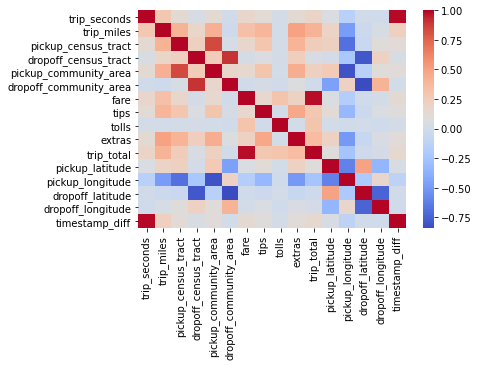

In [112]:
sns.heatmap(taxi.corr(), cmap='coolwarm')

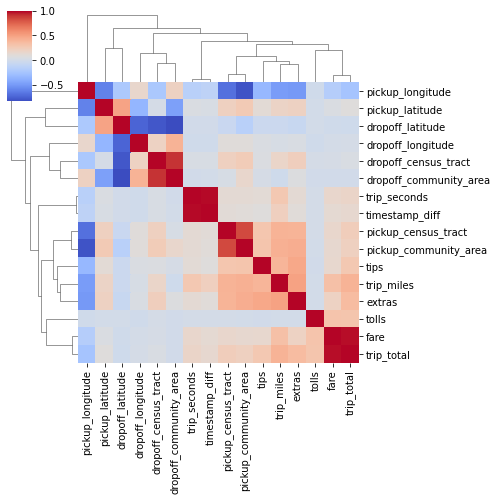

In [136]:
sns.clustermap(taxi.corr(), cmap='coolwarm', figsize=(7,7))

Thre doesnt seem to be any surprising correlation. fare and trip total, census and community data, trip time and trip time derived from timestamps, geographical coordinates also understandably are coralated

Summing up when it comes to discrepancies and missing data:
- unique_key, taxi_id are irrelevant,
- start and end timestamps can indicate date and time of day but not length of the trip
- trip_seconds indicates length of the trip time-wise but is inconsistent with the timestamps
- trip_miles tells the distance of the trip,
- pickup/dropoff census/community data indicate relative geographical location (their coherency and consistency with each other and long/lat coordinates are unknown),
- fare - cost of the trip, high correlation with trip_total
- trip_total - total price of the trip with tolls, extras an tips includes,
- tips - tip amount (mostly 0 dolars),
- tolls - mosty indicates whether a trip included a 0 dolars(?) toll or there is no toll info at all,
- extras shows extra fees (mostly 0 dolars),
- payment_type,
- company - not a lot of data but quite diverse,
- geolocation data is indicative of the location however is not complete, could be engineered based on census/comunity data,
- timestamp_diff, trip length time-wise calculated based on timestamps

Now lets explore the data some more, taking under consideration that some data is incoherent. Possibly explore the diff between visualising orig vs cleaned dataset.

In [164]:
#lets prepare a slightly cleaner dataset first
taxi_clean = taxi.dropna(subset=(['trip_seconds', 'trip_miles', 'fare','tips','extras','trip_total']))

In [165]:
taxi_clean = taxi_clean.drop(['unique_key', 'taxi_id'], axis=1)

In [175]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   unique_key              200000 non-null  object             
 1   taxi_id                 200000 non-null  object             
 2   trip_start_timestamp    200000 non-null  datetime64[ns, UTC]
 3   trip_end_timestamp      200000 non-null  datetime64[ns, UTC]
 4   trip_seconds            199957 non-null  float64            
 5   trip_miles              199989 non-null  float64            
 6   pickup_census_tract     88947 non-null   float64            
 7   dropoff_census_tract    77952 non-null   float64            
 8   pickup_community_area   170983 non-null  float64            
 9   dropoff_community_area  126673 non-null  float64            
 10  fare                    199988 non-null  float64            
 11  tips                    19

In [177]:
taxi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trip_seconds,199957.0,1.017396e+03,2151.855247,0.000000e+00,4.200000e+02,7.200000e+02,1.200000e+03,8.634000e+04
trip_miles,199989.0,5.543039e+00,7.625035,0.000000e+00,1.300000e+00,2.500000e+00,7.000000e+00,3.881000e+02
pickup_census_tract,88947.0,1.703137e+10,336604.067465,1.703101e+10,1.703108e+10,1.703128e+10,1.703183e+10,1.703198e+10
dropoff_census_tract,77952.0,1.703127e+10,143493.555847,1.703101e+10,1.703128e+10,1.703128e+10,1.703133e+10,1.703184e+10
pickup_community_area,170983.0,2.791445e+01,24.662098,1.000000e+00,8.000000e+00,2.400000e+01,3.200000e+01,7.700000e+01
dropoff_community_area,126673.0,1.938113e+01,12.422530,1.000000e+00,8.000000e+00,2.800000e+01,3.300000e+01,6.000000e+01
fare,199988.0,1.566640e+01,41.823396,0.000000e+00,6.750000e+00,1.000000e+01,1.875000e+01,9.211590e+03
tips,199988.0,1.481971e+00,3.466699,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.990000e+02
tolls,169863.0,4.999382e-03,0.485594,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01
extras,199988.0,2.107558e+00,5.940803,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.950000e+01


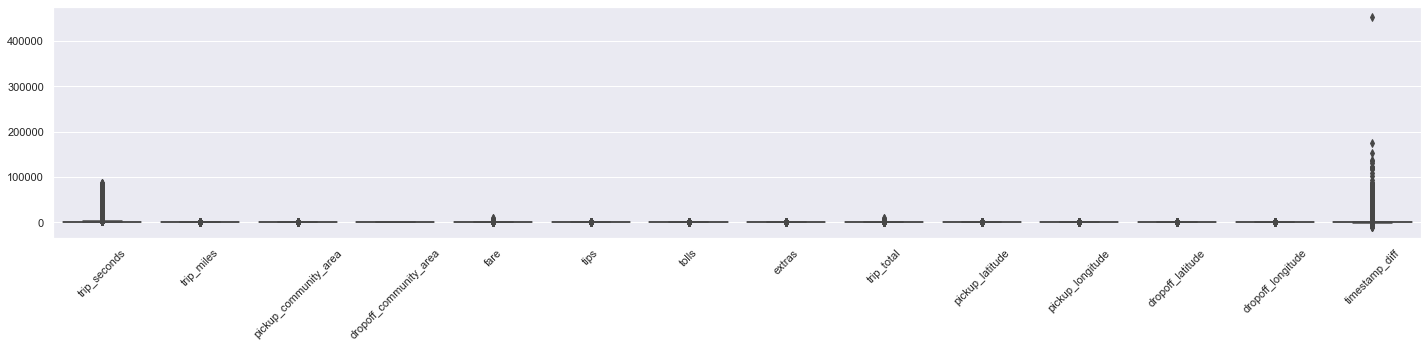

In [387]:
plt.figure(figsize=(20,5))
sns.boxplot(data=taxi.drop(['pickup_census_tract', 'dropoff_census_tract'],axis=1))
plt.xticks(rotation=45)
plt.tight_layout()

Some serious outliers in timestamp_diff

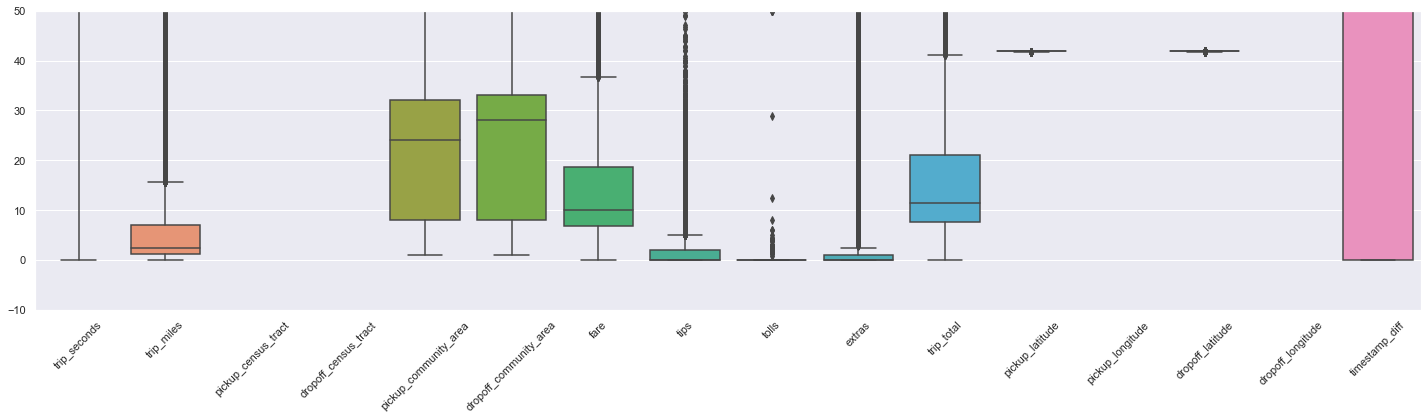

In [386]:
plt.figure(figsize=(20,6))
sns.boxplot(data=taxi_clean)
plt.xticks(rotation=45)
plt.ylim((-10, 50))
plt.tight_layout()
#zoom on lower values

In [360]:
taxi_numeric = taxi_clean.select_dtypes(include=np.number)
normalized_taxi=(taxi_numeric-taxi_numeric.min())/(taxi_numeric.max()-taxi_numeric.min())

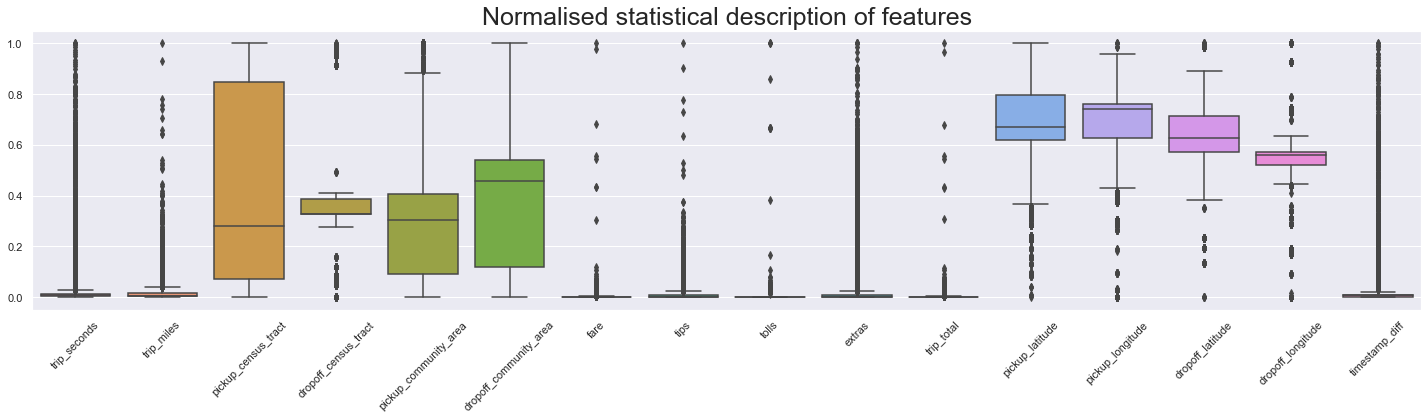

In [374]:
plt.figure(figsize=(20,6))
sns.boxplot(data=normalized_taxi)
plt.xticks(rotation=45)
plt.title('Normalised statistical description of features', fontsize=25)
plt.tight_layout()

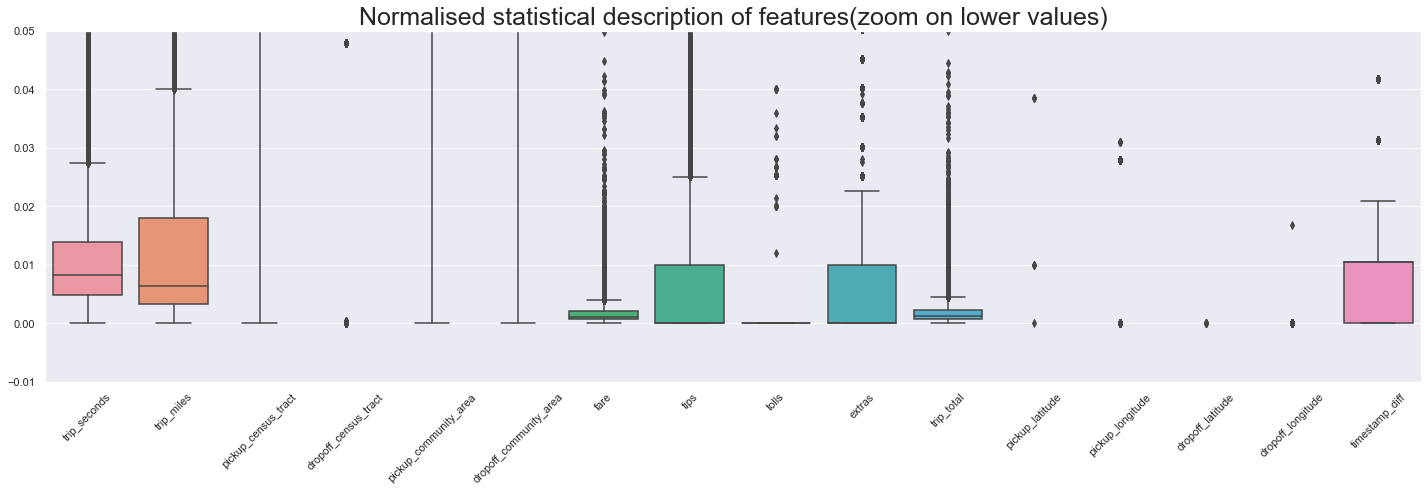

In [384]:
plt.figure(figsize=(20,7))
sns.boxplot(data=normalized_taxi)
plt.xticks(rotation=45)
plt.title('Normalised statistical description of features(zoom on lower values)', fontsize=25)
plt.ylim((-0.01, 0.05))
plt.tight_layout()

<AxesSubplot:>

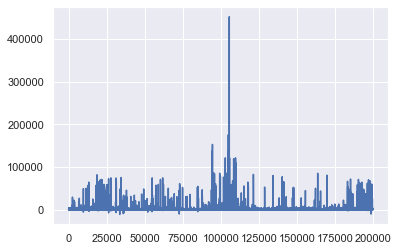

In [230]:
taxi['timestamp_diff'].plot()

In [351]:
taxi[taxi['timestamp_diff']>200000]

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,timestamp_diff
105541,39544d29e7ea0996b35e0138cfda40a1cf7a45b7,dc8308119085efb9f3e300163e0f197176fc2791d9d6ed...,2017-08-24 13:00:00+00:00,2017-08-29 18:30:00+00:00,NaN,0.0,NaN,NaN,59.0,NaN,...,3.25,Cash,Chicago Carriage Cab Corp,41.829922,-87.672503,POINT (-87.6725026464 41.8299223039),NaN,NaN,NaN,451800.0


Those timestamps really are weird. Thats a really long trip, over 24h long, yet the price for it is low. 

In [198]:
taxi_clean = taxi_clean.drop(taxi_clean[taxi_clean['timestamp_diff']>200000].index)

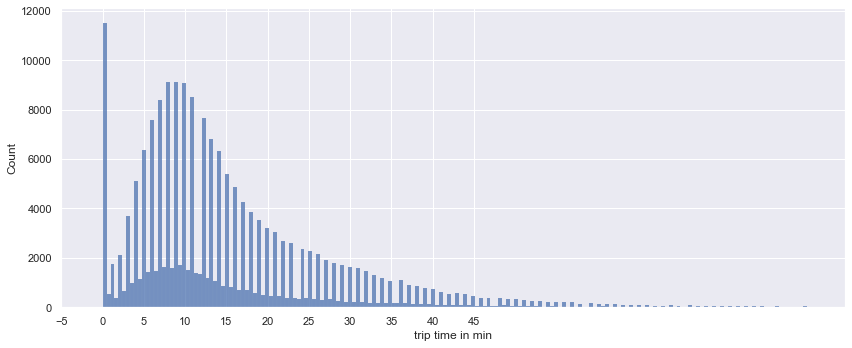

In [355]:
plt.figure(figsize=(12,5))
sns.histplot(taxi_clean['trip_seconds'].apply(lambda x:x/60), bins=3000)
plt.xlim((-5, 90))
plt.xlabel('trip time in min')
plt.xticks(np.arange(-5, 50, 5))
plt.tight_layout()
#Distribution of trip time 

<AxesSubplot:>

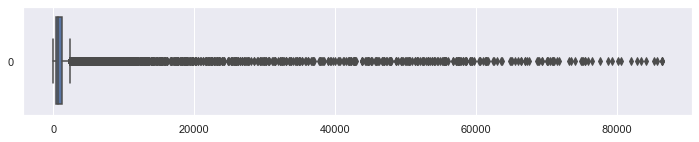

In [390]:
plt.figure(figsize=(12,2))
sns.boxplot(data=taxi['trip_seconds'], orient='h')

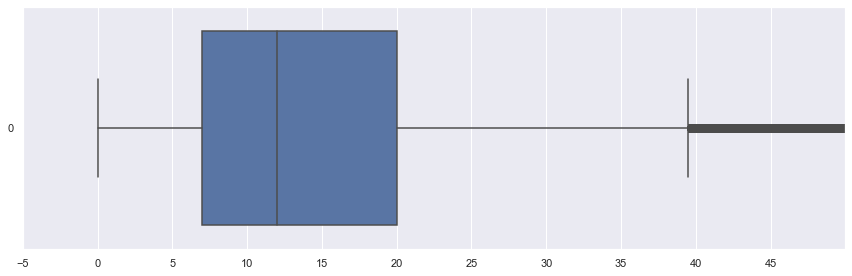

In [321]:
plt.figure(figsize=(12,4))
sns.boxplot(data=taxi['trip_seconds'].apply(lambda x:x/60), orient='h')
plt.xlim((-5,50))
plt.xticks(np.arange(-5, 50, 5))
plt.tight_layout()

In [275]:
taxi['payment_type'].value_counts().head()
#top 5 payment methods

Cash           130485
Credit Card     68920
Prcard            431
Mobile             74
Pcard              65
Name: payment_type, dtype: int64

In [670]:
QUERY = """
SELECT
  payment_type,
  COUNT(1) AS rides
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY 
  payment_type
ORDER BY
  rides DESC
"""

<AxesSubplot:xlabel='payment_type', ylabel='Count'>

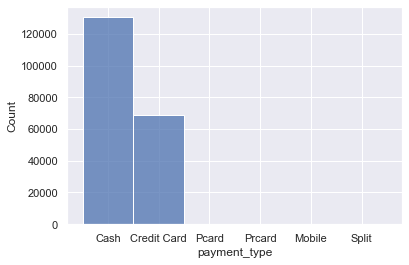

In [233]:
sns.histplot(data=taxi['payment_type'])

In [264]:
taxi['company'].value_counts().head()
#Top 5 taxi companies

Chicago Carriage Cab Corp          18457
303 Taxi                           17705
City Service                        9989
Medallion Leasin                    9306
Taxi Affiliation Service Yellow     8937
Name: company, dtype: int64

<AxesSubplot:xlabel='count', ylabel='company'>

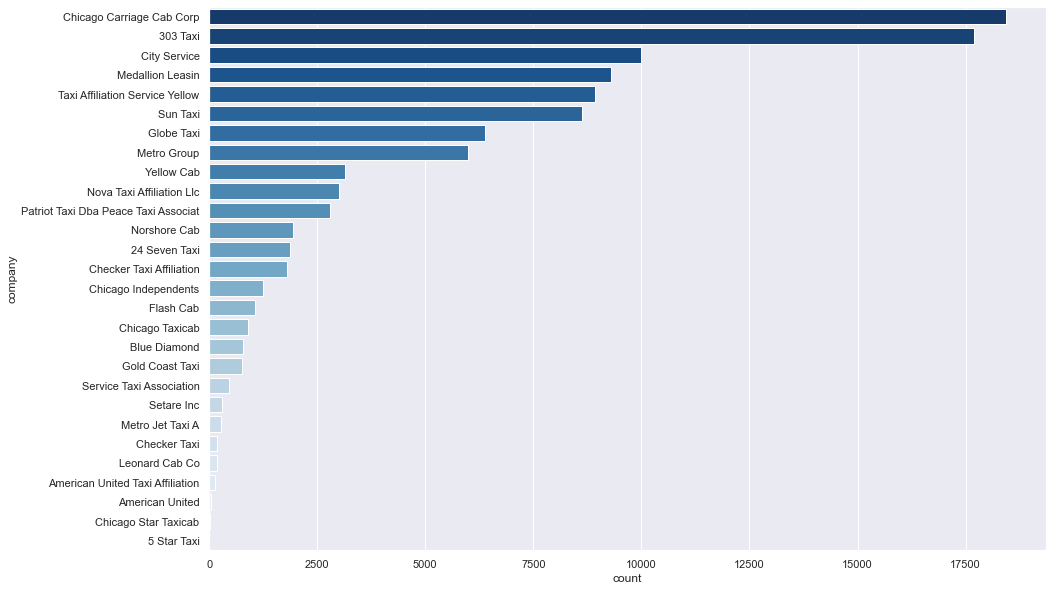

In [462]:
plt.figure(figsize=(15,10))
sns.countplot(data=taxi_clean, y='company', order=taxi['company'].value_counts().index, palette='Blues_r')

<AxesSubplot:xlabel='trip_miles', ylabel='Count'>

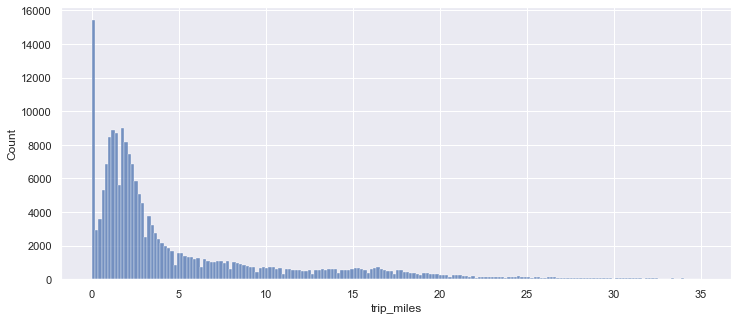

In [397]:
plt.figure(figsize=(12,5))
sns.histplot(data=taxi_clean[taxi_clean['trip_miles']<35]['trip_miles'])
#Distribution of trip lengths for trips shorter than 35 miles.

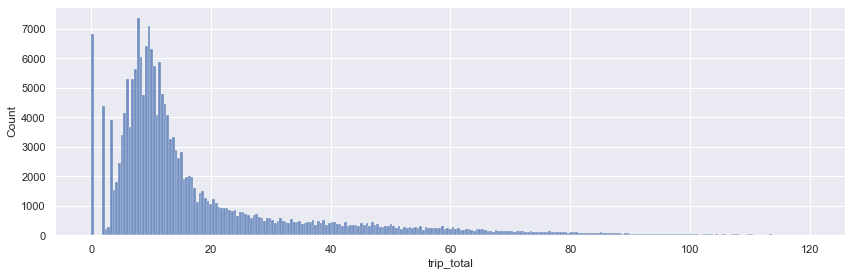

In [446]:
plt.figure(figsize=(12,4))
sns.histplot(taxi_clean[taxi_clean['trip_total']<120]['trip_total'])
plt.tight_layout()
#Distribution of total trip price

In [437]:
taxi_clean['pickup_community_area'].value_counts().head(10)
#Top 10 pickup communities

8.0     47914
32.0    32772
76.0    25151
6.0     11149
28.0    10549
7.0      7669
3.0      5246
24.0     4921
56.0     4872
33.0     4492
Name: pickup_community_area, dtype: int64

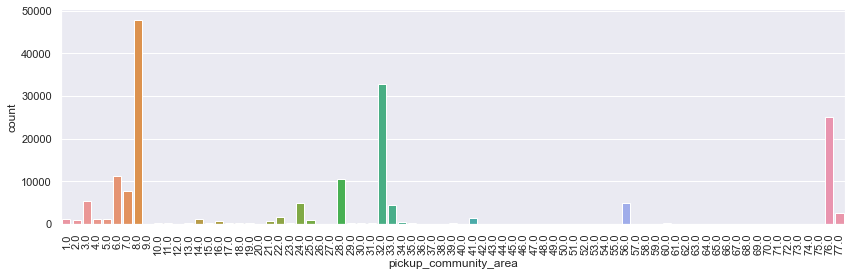

In [445]:
plt.figure(figsize=(12,4))
sns.countplot(x=taxi_clean['pickup_community_area'])
plt.xticks(range(0,77,1))
plt.xticks(rotation=90)
plt.tight_layout()
#Most common pickup communities

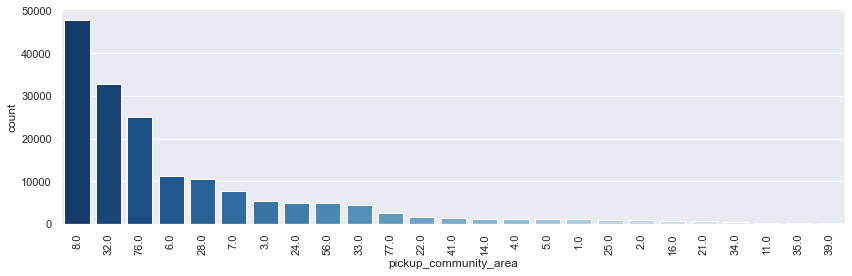

In [463]:
plt.figure(figsize=(12,4))
sns.countplot(x=taxi_clean['pickup_community_area'], order=taxi_clean['pickup_community_area'].value_counts().head(25).index, palette='Blues_r')
#plt.xticks(range(0,77,1))
plt.xticks(rotation=90)
plt.tight_layout()
#25 most common pickup communities

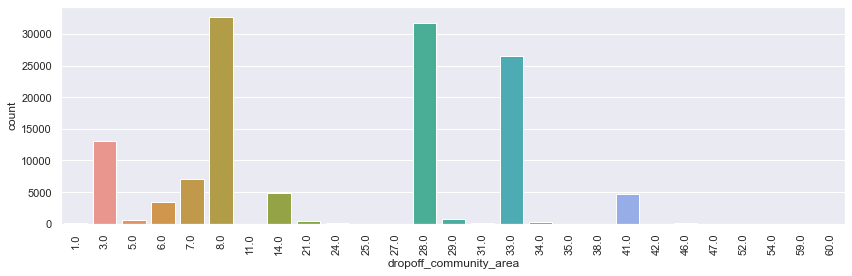

In [468]:
plt.figure(figsize=(12,4))
sns.countplot(x=taxi_clean['dropoff_community_area'])
plt.xticks(rotation=90)
plt.tight_layout()
#Most common dropoff communities

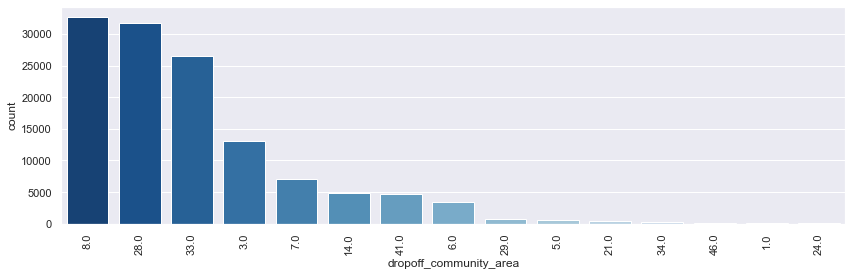

In [466]:
plt.figure(figsize=(12,4))
sns.countplot(x=taxi_clean['dropoff_community_area'], order=taxi_clean['dropoff_community_area'].value_counts().head(15).index, palette='Blues_r')
#plt.xticks(range(0,77,1))
plt.xticks(rotation=90)
plt.tight_layout()
#Most popular dropoff communities

To compare some of the features against each other some feature engineering will be usefull. I will extract day, month, year and dayofweek from the timestamp as well as add trip_speed.

In [469]:
taxi_clean['day'] = taxi_clean['trip_start_timestamp'].apply(lambda x: x.day)
taxi_clean['month'] = taxi_clean['trip_start_timestamp'].apply(lambda x: x.month)
taxi_clean['year'] = taxi_clean['trip_start_timestamp'].apply(lambda x: x.year)

In [556]:
taxi_clean['date'] = taxi_clean['trip_start_timestamp'].apply(lambda x: x.date)

After consideration in additin to dayofweek I will add weekend (1 for weekend and 0 for weekday)

In [476]:
taxi_clean['dayofweek'] = taxi_clean['trip_start_timestamp'].apply(lambda x: x.weekday)

In [477]:
taxi_clean['isweekend'] = taxi_clean['dayofweek'].apply(lambda day: 0 if day in range(0,5) else 1)

In [579]:
def speed(time, distance):
    if time == 0 or distance == 0:
        return 0.0
    time = time/60 #minutes
    return distance*60/time #miles/h

In [580]:
speed(15*60, 100)

400.0

In [581]:
taxi_clean['trip_speed'] = taxi_clean[['trip_seconds', 'trip_miles']].apply(lambda x: speed(x[0], x[1]), axis=1)

<AxesSubplot:xlabel='trip_seconds', ylabel='fare'>

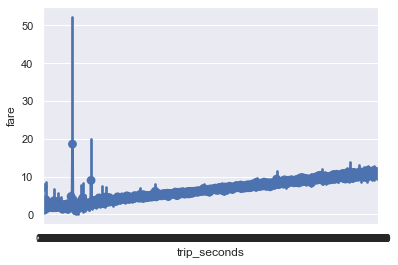

In [502]:
sns.pointplot(y=taxi_clean['fare'], x=taxi_clean[taxi_clean['trip_seconds']<(12*60)]['trip_seconds'])
#Change in fare depending on the duration of the trip (for short trips less than 12 min)

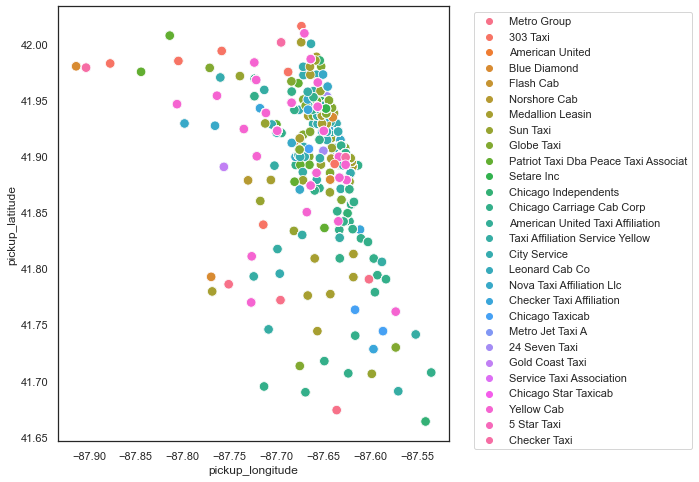

In [523]:
plt.figure(figsize=(7,8))
sns.set_style('white')
sns.scatterplot(x=taxi_clean['pickup_longitude'], y=taxi_clean['pickup_latitude'], hue=taxi_clean['company'], s=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#Geo distribution of companies used

We can see how geo coordinates of pickup locations follow the shape of Chicago. We can see the density of pickups. Unfortunately there doesn't seem to be enough information about tips to gauge their distribution.

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

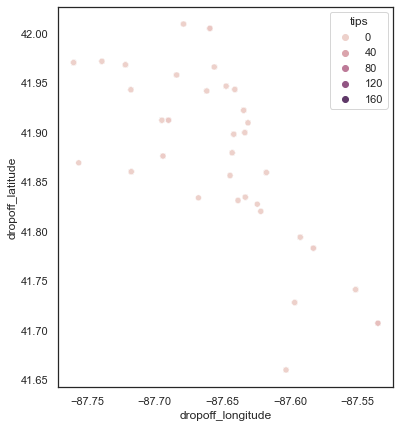

In [536]:
plt.figure(figsize=(6,7))
sns.set_style('white')
sns.scatterplot(x=taxi_clean['dropoff_longitude'], y=taxi_clean['dropoff_latitude'], hue=taxi_clean['tips'])

As for dropoff location there is clearly not enough data.

In [530]:
taxi_clean.isnull().sum()

trip_start_timestamp           0
trip_end_timestamp             0
trip_seconds                   0
trip_miles                     0
pickup_census_tract       111020
dropoff_census_tract      122007
pickup_community_area      29010
dropoff_community_area     73296
fare                           0
tips                           0
tolls                      30124
extras                         0
trip_total                     0
payment_type                   0
company                    93640
pickup_latitude            28995
pickup_longitude           28995
pickup_location            28995
dropoff_latitude           73296
dropoff_longitude          73296
dropoff_location           73296
timestamp_diff                 0
day                            0
month                          0
year                           0
dayofweek                      0
isweekend                      0
trip_speed                     0
dtype: int64

In [542]:
taxi_clean = taxi_clean.drop(sub_col('census'), axis=1)
#I'm removing census columns because I'm not gonna use them in visualisations.
#They provide higher precision than community area code but the contain a lot less data.

<AxesSubplot:xlabel='month', ylabel='fare'>

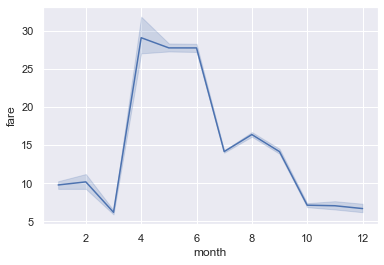

In [546]:
sns.set_theme()
sns.lineplot(x=taxi_clean['month'], y=taxi_clean['fare'])
#change in fare depending on month

Text(0.5, 1.0, 'Fare over time')

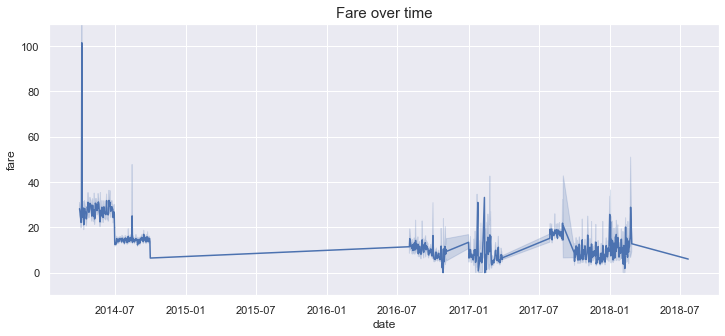

In [592]:
plt.figure(figsize=(12,5))
sns.lineplot(x=taxi_clean['date'], y=taxi_clean['fare'])
plt.ylim(-10,110)
plt.title('Fare over time', fontsize=15)

<AxesSubplot:xlabel='trip_speed', ylabel='company'>

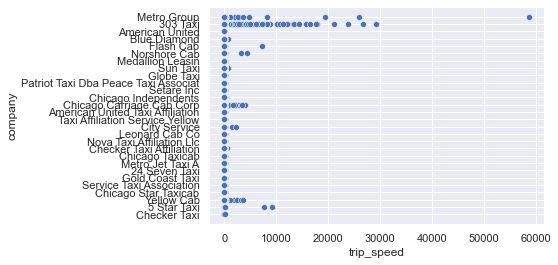

In [583]:
sns.scatterplot(x=taxi_clean['trip_speed'], y=taxi_clean['company'])

In [584]:
taxi_clean['trip_speed'].sort_values(ascending=False).head(10)

7828      58680.000000
8775      29160.000000
93472     26820.000000
181032    25920.000000
94237     23940.000000
1523      21240.000000
181360    19388.571429
93473     17820.000000
176973    17760.000000
174746    16560.000000
Name: trip_speed, dtype: float64

In [587]:
taxi_clean.loc[7828][['trip_seconds', 'trip_miles']]

trip_seconds       1
trip_miles      16.3
Name: 7828, dtype: object

That dataset is seriously full of absurd values. I am not sure whether the exercise was about data engineering or analysis because the data needs serious cleaning before its usable.

<AxesSubplot:xlabel='trip_speed', ylabel='company'>

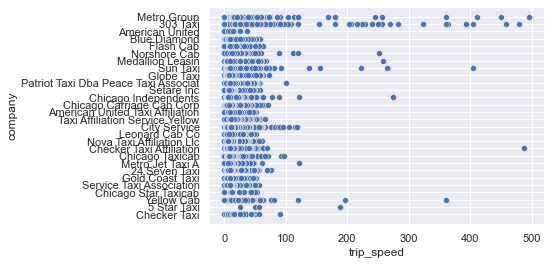

In [591]:
sns.scatterplot(x=taxi_clean['trip_speed'][taxi_clean['trip_speed']<500], y=taxi_clean['company'])

At this point I am not sure whether the above means that the MetroGroup company has the fastest drivers or is the least reliable in recording distasnce and time data.

<AxesSubplot:xlabel='date'>

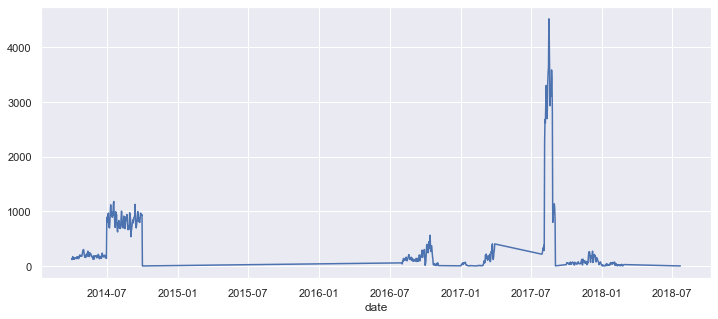

In [602]:
plt.figure(figsize=(12,5))
taxi_clean.groupby('date').size().plot()
#Amount of rides against time

<AxesSubplot:xlabel='month'>

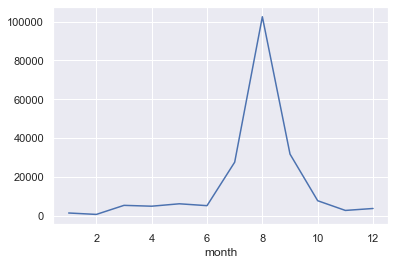

In [638]:
taxi_clean.groupby('month').count()['fare'].plot()
#Amount of trips/month averaged across years

A lot more trips during August.

<AxesSubplot:xlabel='dayofweek'>

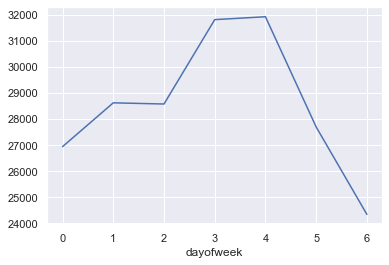

In [636]:
taxi_clean.groupby('dayofweek').count()['fare'].plot()
#Trips during a week

More trips at the end of the week (Thrusday and Friday)

<AxesSubplot:xlabel='year', ylabel='month'>

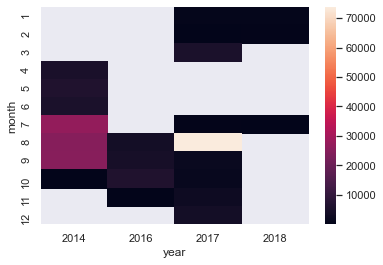

In [641]:
sns.heatmap(taxi_clean.groupby(['month', 'year']).count()['fare'].unstack())
#Amount of trips per month and year

The data is clearly fragmented. I dont't believe I introduced those abnormalities. 

In [645]:
taxi_clean['year'].value_counts()

2014    93640
2017    90252
2016    14721
2018     1331
Name: year, dtype: int64

Clearly apart from some huge absurd values in almost every feature, the data is also lacking a lot of data.

Summing up there was some information to learn something about the dataset. I hope I presented them on graphs quite clearly. Where the information is not clear, I was probably exploring to find something of meaning. I am leaving all my workings and  dead ends as a record of my working process.

In [625]:
%load_ext google.cloud.bigquery

In [646]:
import os

In [656]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\rrkar\Documents\taxi-312519-0962522ff3e2.json"

In [653]:
from google.oauth2 import service_account
from google.cloud import bigquery

In [659]:
bigquery_client = bigquery.Client()

In [660]:
#example, not mine
QUERY = """
SELECT
  EXTRACT(DAYOFWEEK
  FROM
    trip_start_timestamp) AS day,
  FORMAT('%3.2f',
    MAX(fare)) AS maximum_fare,
  FORMAT('%3.2f',
    MIN(fare)) AS minimum_fare,
  FORMAT('%3.2f',
    AVG(fare)) AS avg_fare,
  FORMAT('%3.2f',
    STDDEV(fare)) AS std_dev_fare,
  COUNT(1) AS rides
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  trip_seconds >= 600
GROUP BY
  day
ORDER BY
  day
"""

In [661]:
query_job = bigquery_client.query(QUERY)

In [669]:
#df = query_job.to_dataframe()

In [667]:
#df.head()

Unfortunately I didnt'have enough time to debug why it doesnt work. I added some queries that I tested on Google Platform. I have to admit some were to complex for me to translate them into sql.

I cant say I'm impressed with that analysis, but I'l like to think I did what I could. There is definitely room for improvement. I could have skipped trying to cleanup the data as we are not trying to train a predictive model afterall. I also think that querying the original dataset would result in much better visualisaitons. That dataset was quite defragmented and with some very drastic outliers.